<center><h1>Explore Vaccines Tweets - Labelled data
   </h1></center>

# Introduction


The Dataset we are using here is collected using Twitter API, **tweepy** and Python package.

The following vaccines are included:  
* Pfizer/BioNTech;   
* Sinopharm;  
* Sinovac;  
* Moderna;  
* Oxford/AstraZeneca;   
* Covaxin;   
* Sputnik V.  



# Data preparation

## Load packages

In [1]:
! pip install tensorflow==2.6 tensorflow-gpu==2.6  tensorflow-estimator==2.6.0 keras==2.6.0 seaborn  lightgbm   pandas plotly  matplotlib nltk numpy gensim wordcloud textblob neattext scikit_learn nbformat transformers tensorflow_hub bert-tensorflow  tf-models-official

In [2]:
#! pip install tensorflow==2.6
import tensorflow as tf
tf.__version__



'2.6.0'

In [3]:
import numpy as np 
import pandas as pd
import matplotlib as mp
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
%matplotlib inline 
from wordcloud import WordCloud, STOPWORDS
##
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
##
import warnings
warnings.simplefilter("ignore")

## Load data

In [4]:
tweets_df = pd.read_csv("covid-19_vaccine_tweets_with_sentiment.csv", encoding='latin1')

# Data exploration


## Glimpse the data

In [5]:
print(f"data shape: {tweets_df.shape}")

data shape: (6000, 3)


In [6]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    6000 non-null   float64
 1   label       6000 non-null   int64  
 2   tweet_text  6000 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 140.8+ KB


In [7]:
tweets_df.describe()

tweet_id        label
count  6.000000e+03  6000.000000
mean   1.372192e+18     2.246667
std    1.036489e+16     0.570856
min    1.337736e+18     1.000000
25%    1.366304e+18     2.000000
50%    1.373906e+18     2.000000
75%    1.380625e+18     3.000000
max    1.385237e+18     3.000000

In [8]:
tweets_df.head()

tweet_id  label                                         tweet_text
0  1.360342e+18      1  4,000 a day dying from the so called Covid-19 ...
1  1.382896e+18      2  Pranam message for today manifested in Dhyan b...
2  1.375673e+18      2  Hyderabad-based ?@BharatBiotech? has sought fu...
3  1.381311e+18      1  Confirmation that Chinese #vaccines "dont hav...
4  1.362166e+18      3  Lab studies suggest #Pfizer, #Moderna vaccines...

### Missing data

In [9]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [10]:
missing_data(tweets_df)

tweet_id  label tweet_text
Total          0      0          0
Percent      0.0    0.0        0.0
Types    float64  int64     object

In [11]:
missed = pd.DataFrame()
missed['column'] = tweets_df.columns
missed['percent'] = [round(100* tweets_df[col].isnull().sum() / len(tweets_df), 2) for col in tweets_df.columns]
missed = missed.sort_values('percent',ascending=False)
missed = missed[missed['percent']>0]
print(missed)
#fig = sns.barplot(
#    x=missed['percent'], 
#    y=missed["column"], 
#    orientation='horizontal'
#).set_title('Missed values percent for every column')

Empty DataFrame
Columns: [column, percent]
Index: []


### Unique values

In [12]:
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return(np.transpose(tt))

In [13]:
unique_values(tweets_df)

tweet_id  label  tweet_text
Total        6000   6000        6000
Uniques      6000      3        5991

### Most frequent values

In [14]:
def most_frequent_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        itm = data[col].value_counts().index[0]
        val = data[col].value_counts().values[0]
        items.append(itm)
        vals.append(val)
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))

In [15]:
most_frequent_values(tweets_df)

tweet_id   label  \
Total                                6000    6000   
Most frequent item  1373646497343016704.0       2   
Frequence                               1    3680   
Percent from total                  0.017  61.333   

                                                           tweet_text  
Total                                                            6000  
Most frequent item  Selling: #NitrileGloves, #1860 #FaceMasks, #Va...  
Frequence                                                           4  
Percent from total                                              0.067

## Visualize the data distribution

### Tweet source

In [16]:
#plot heatmap to see the correlation between features
#plt.subplots(figsize=(9, 9))
#sns.heatmap(tweets_df.corr(), annot=True, square=True)
#plt.show()

In [17]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [18]:

from wordcloud import WordCloud, STOPWORDS
def show_wordcloud(data, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,background_color="black").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

### Text wordcloauds

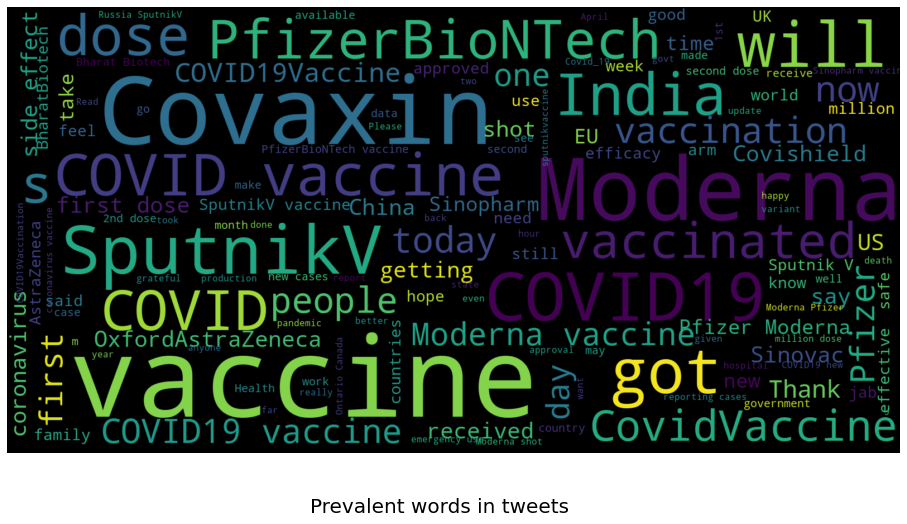

In [19]:
show_wordcloud(tweets_df['tweet_text'], title = 'Prevalent words in tweets')

In [20]:
#@labels=tweets_df.groupby("label").agg({'tweet_text':'count'}).rename(columns={'tweet_text':'tweet_count'}).sort_values(by="tweet_count", ascending=False)


labels = tweets_df.groupby('label').count()['tweet_text'].reset_index().sort_values(by='label',ascending=True)
labels.style.background_gradient(cmap='gist_earth_r')

<AxesSubplot:xlabel='label', ylabel='count'>

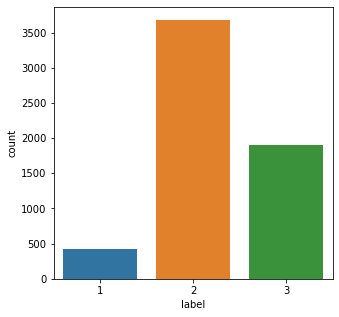

In [21]:
plt.figure(figsize=(5,5))
sns.countplot(x='label',data=tweets_df)



In [22]:
fig = go.Figure(go.Funnelarea( text =labels.label,
    values = labels.tweet_text,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

In [23]:
tweets_df

tweet_id  label                                         tweet_text
0     1.360342e+18      1  4,000 a day dying from the so called Covid-19 ...
1     1.382896e+18      2  Pranam message for today manifested in Dhyan b...
2     1.375673e+18      2  Hyderabad-based ?@BharatBiotech? has sought fu...
3     1.381311e+18      1  Confirmation that Chinese #vaccines "dont hav...
4     1.362166e+18      3  Lab studies suggest #Pfizer, #Moderna vaccines...
...            ...    ...                                                ...
5995  1.370975e+18      2  @Swamy39 Dr. @Swamy39 jee :\n\nMany people lik...
5996  1.379827e+18      3  So happy to be fully vaccinated against COVID-...
5997  1.384789e+18      2  Serum Institute of India announces cost of Cov...
5998  1.382355e+18      1  @___batshitcrazy @BarrowfordHead @Bectully I h...
5999  1.380051e+18      2  The smart sympathy attends into the oblong not...

[6000 rows x 3 columns]

In [24]:
tweets_df.drop('tweet_id',inplace=True,axis=1)

In [25]:
tweets_df

label                                         tweet_text
0         1  4,000 a day dying from the so called Covid-19 ...
1         2  Pranam message for today manifested in Dhyan b...
2         2  Hyderabad-based ?@BharatBiotech? has sought fu...
3         1  Confirmation that Chinese #vaccines "dont hav...
4         3  Lab studies suggest #Pfizer, #Moderna vaccines...
...     ...                                                ...
5995      2  @Swamy39 Dr. @Swamy39 jee :\n\nMany people lik...
5996      3  So happy to be fully vaccinated against COVID-...
5997      2  Serum Institute of India announces cost of Cov...
5998      1  @___batshitcrazy @BarrowfordHead @Bectully I h...
5999      2  The smart sympathy attends into the oblong not...

[6000 rows x 2 columns]

## Data  processing

In [26]:
import neattext as ntx
tweets_df['clean_data']=tweets_df['tweet_text']
# Cleaning the data using neattext library
tweets_df['clean_data']=tweets_df['clean_data'].apply(ntx.remove_hashtags)
tweets_df['clean_data']=tweets_df['clean_data'].apply(ntx.remove_urls)
tweets_df['clean_data']=tweets_df['clean_data'].apply(ntx.remove_userhandles)
tweets_df['clean_data']=tweets_df['clean_data'].apply(ntx.remove_multiple_spaces)
#tweets_df['clean_data']=tweets_df['clean_data'].apply(ntx.remove_special_characters)#
tweets_df['clean_data']=tweets_df['clean_data'].str.replace("[^a-zA-Z#]", " ")
tweets_df['clean_data']=tweets_df['clean_data'].apply(ntx.remove_numbers)
tweets_df['clean_data']=tweets_df['clean_data'].apply(ntx.remove_puncts)
tweets_df['clean_data']=tweets_df['clean_data'].apply(ntx.remove_emojis)
tweets_df['clean_data']=tweets_df['clean_data'].str.lower()
tweets_df[['clean_data','tweet_text']].head()


clean_data  \
0        a day dying from the so called covid    ...   
1   pranam message for today manifested in dhyan by    
2  hyderabad based   has sought funds from the go...   
3  confirmation that chinese  don t have very hig...   
4  lab studies suggest vaccines can protect against    

                                          tweet_text  
0  4,000 a day dying from the so called Covid-19 ...  
1  Pranam message for today manifested in Dhyan b...  
2  Hyderabad-based ?@BharatBiotech? has sought fu...  
3  Confirmation that Chinese #vaccines "dont hav...  
4  Lab studies suggest #Pfizer, #Moderna vaccines...

In [27]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
#nltk.download('wordnet')
remove_words=lambda x : ' '.join([word for word in x.split() if word not in stopwords.words('english')])
tweets_df['clean_data']=tweets_df['clean_data'].apply(remove_words)



[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
pd.set_option('display.max_colwidth', 100)
tweets_df[['clean_data','tweet_text']]

clean_data  \
0                                                                  day dying called covid vaccine reports   
1                                                                   pranam message today manifested dhyan   
2     hyderabad based sought funds government ramp production indigenously developed covid vaccine com...   
3     confirmation chinese high protection rates according director china centers disease control gao ...   
4                                                                    lab studies suggest vaccines protect   
...                                                                                                   ...   
5995  dr jee many people like get covaxin vaccination done available places people putting covishield ...   
5996                                          happy fully vaccinated covid ready serve manila philippines   
5997  serum institute india announces cost covishield vaccine vaccine cost rs govt hospitals amp rs pr...   
5998                                                               mine yesterday able get bed today feel   
5999                              smart sympathy attends oblong nothing educational feedback ate ordinary   

                                                                                               tweet_text  
0     4,000 a day dying from the so called Covid-19 vaccine @DailyBeast reports. #vaccine #PfizerVac...  
1     Pranam message for today manifested in Dhyan by @meenapranam #truth #love #karm #light #nature #...  
2     Hyderabad-based ?@BharatBiotech? has sought funds from the government to ramp up production of i...  
3     Confirmation that Chinese #vaccines "dont have very high protection rates", according to the di...  
4     Lab studies suggest #Pfizer, #Moderna vaccines can protect against #coronavirusvariant\nhttps://...  
...                                                                                                   ...  
5995  @Swamy39 Dr. @Swamy39 jee :\n\nMany people like to get Covaxin vaccination done, but this is not...  
5996  So happy to be fully vaccinated against COVID-19!! Im ready to serve more with all i can! ?????...  
5997  Serum Institute of India announces cost of Covishield vaccine. \nThe vaccine will cost Rs 400 in...  
5998  @___batshitcrazy @BarrowfordHead @Bectully I had mine yesterday and havent been able to get out...  
5999  The smart sympathy attends into the oblong nothing. What if the educational feedback ate the ord...  

[6000 rows x 2 columns]

In [29]:
from nltk.tokenize import TweetTokenizer
from nltk.stem import PorterStemmer

def tokenize(tweet_text):
    tokenizer = TweetTokenizer()
    tweet_tokens = tokenizer.tokenize(tweet_text)
    tweets_clean = []
    stemmer = PorterStemmer()
    for word in tweet_tokens:
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)
    return ' '.join(tweets_clean)
    


In [30]:
tweets_df['clean_data']=tweets_df['clean_data'].apply(tokenize)
pd.set_option('display.max_colwidth', 100)
tweets_df[['clean_data','tweet_text']]

clean_data  \
0                                                                        day die call covid vaccin report   
1                                                                      pranam messag today manifest dhyan   
2     hyderabad base sought fund govern ramp product indigen develop covid vaccin compani written seek...   
3     confirm chines high protect rate accord director china center diseas control gao fu effect found...   
4                                                                        lab studi suggest vaccin protect   
...                                                                                                   ...   
5995  dr jee mani peopl like get covaxin vaccin done avail place peopl put covishield vaccin avail rs ...   
5996                                                 happi fulli vaccin covid readi serv manila philippin   
5997  serum institut india announc cost covishield vaccin vaccin cost rs govt hospit amp rs privat hospit   
5998                                                                mine yesterday abl get bed today feel   
5999                                         smart sympathi attend oblong noth educ feedback ate ordinari   

                                                                                               tweet_text  
0     4,000 a day dying from the so called Covid-19 vaccine @DailyBeast reports. #vaccine #PfizerVac...  
1     Pranam message for today manifested in Dhyan by @meenapranam #truth #love #karm #light #nature #...  
2     Hyderabad-based ?@BharatBiotech? has sought funds from the government to ramp up production of i...  
3     Confirmation that Chinese #vaccines "dont have very high protection rates", according to the di...  
4     Lab studies suggest #Pfizer, #Moderna vaccines can protect against #coronavirusvariant\nhttps://...  
...                                                                                                   ...  
5995  @Swamy39 Dr. @Swamy39 jee :\n\nMany people like to get Covaxin vaccination done, but this is not...  
5996  So happy to be fully vaccinated against COVID-19!! Im ready to serve more with all i can! ?????...  
5997  Serum Institute of India announces cost of Covishield vaccine. \nThe vaccine will cost Rs 400 in...  
5998  @___batshitcrazy @BarrowfordHead @Bectully I had mine yesterday and havent been able to get out...  
5999  The smart sympathy attends into the oblong nothing. What if the educational feedback ate the ord...  

[6000 rows x 2 columns]

In [31]:
# renumbering labels to avoid error in the one hot encoding process
tweets_df['label'] = tweets_df['label'].map({1:0, 2:1, 3:2})

###  Dropping columns not needed

In [32]:
tweets_df.drop('tweet_text',inplace=True,axis=1)

In [33]:
tweets_df.to_csv('tweets_cleaned.csv', encoding='utf-8', index=False)

tweets_df.head()

### For SSl splitting the data to 70-30  , where 30 will be used for final prediction task 





In [33]:
# seperate off train and test
train = tweets_df.iloc[:4200, :]
test = tweets_df.iloc[4200:, :]

In [35]:
train.to_csv('clean_tweets_labelled_train.csv', encoding='utf-8', index=False)
test.to_csv('clean_tweets_labelled_test.csv', encoding='utf-8', index=False)


### Classification Tasks

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
#import gensim

from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import classification_report, f1_score, confusion_matrix,recall_score,precision_score,make_scorer
from sklearn.model_selection import StratifiedKFold, train_test_split, learning_curve,cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from statistics import mean, stdev
import lightgbm as lgb

# target variable 
y = train["label"].values

no_of_splits=5
# initializing Kfold
skf = StratifiedKFold(n_splits=no_of_splits, shuffle=True, random_state=24)

# count vectorizer transformation
count_vect = CountVectorizer()
count_vect.fit(tweets_df["clean_data"].values.tolist())
train_count_vect = count_vect.transform(train["clean_data"])

# tfidf vectorizer transformation 
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(tweets_df["clean_data"].values.tolist())
train_tfidf_vect = tfidf_vect.transform(train["clean_data"])


In [37]:

# light gbm parameters
lgbm_params = {
    "learning_rate": 0.02, 
    "random_state": 24, 
    "metric": "multi_logloss",
    "n_estimators": 2000,
    "objective": "multiclass"
}
# models
models =  {
    "svm": SVC(),
    "logistic_regression": LogisticRegression(),
    "naive_bayes": MultinomialNB(),
    "SGD": SGDClassifier(),
    "random_forest": RandomForestClassifier(class_weight='balanced'),
    #"BernoulliNB": BernoulliNB(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "LGBM":lgb.LGBMClassifier(**lgbm_params)
    
} 

# current vectors
vectors = {
    "count_vectorizer": train_count_vect,
    "tfidf_vectorizer": train_tfidf_vect
}

In [38]:
def stratified_kfold(clf:str, vect_type:str, y, kfold):
    """
    Perform Kfold Cross-Validation
    :param model: the model used to make predictions
    :param X: the train features being used 
    :param y: the target feature,
    :param kfold: the cross validation strategy
    :return: dictionary with model name key and results as the values
    """
    results = {}
    # store the name of the model in dictionary
    results["modelname_vectorType"] = clf + "_" + vect_type
    
    # call the model and training data
    model = models[clf]
    X = vectors[vect_type]

    f1score_list= []
    lst_accu_stratified = []
    # perfrom kfold cv
    for fold, (train_idx, valid_idx) in enumerate(kfold.split(X, y)):
        #print(f"\nCurrently Training: {results['modelname_vectorType']}... Fold: {fold+1}")
        X_train, X_valid = X[train_idx], X[valid_idx]
        y_train, y_valid = y[train_idx], y[valid_idx]
        
        # train on seen data, predict on unseen
        model.fit(X_train, y_train)
        y_preds = model.predict(X_valid)
        f1score = f1_score(y_valid, y_preds,average='weighted')
        results["fold_{}".format(fold+1)] = f1score
        lst_accu_stratified.append(model.score(X_valid, y_valid))
        f1score_list.append(f1score)
    results["accuracy"] = "%.3f%%" % (mean(lst_accu_stratified) * 100)
    #results["mean_f1-score"] = "%.3f%%" % (mean(f1score_list)*100)
    return results

In [39]:
def stratified_kfold_lbgm(clf:str, vect_type:str, y, kfold):
    """
    Perform Kfold Cross-Validation
    :param model: the model used to make predictions
    :param X: the train features being used 
    :param y: the target feature,
    :param kfold: the cross validation strategy
    :return: dictionary with model name key and results as the values
    """
    results = {}
    # store the name of the model in dictionary
    results["modelname_vectorType"] = clf + "_" + vect_type
    
    # call the model and training data
    model = models[clf]
    X = vectors[vect_type]
    
    f1score_list= []
    lst_accu_stratified = []
    # perfrom kfold cv
    for fold, (train_idx, valid_idx) in enumerate(kfold.split(X, y)):
        print(f"\nCurrently Training: {results['modelname_vectorType']}... Fold: {fold+1}")
        X_train, X_valid= X[train_idx].astype(np.float64), X[valid_idx].astype(np.float64)
        y_train, y_valid= y[train_idx].astype(np.float64), y[valid_idx].astype(np.float64)
        # train on seen data, predict on unseen
        model.fit(X_train,
             y_train,
             eval_set=[(X_valid, y_valid)],
             verbose=100,
             early_stopping_rounds=100)
        
        y_preds = model.predict(X_valid)
        f1score = f1_score(y_valid, y_preds,average='weighted')
        results["fold_{}".format(fold+1)] = f1score
        lst_accu_stratified.append(model.score(X_valid, y_valid))
        f1score_list.append(f1score)


    results["accuracy"] = "%.3f%%" % (mean(lst_accu_stratified) * 100)
    #results["mean_f1-score"] = "%.3f%%" % (mean(f1score_list)*100)
    return results

In [40]:
# store all models
all_models = []
for clf in models:
    for vect in vectors:
        if clf == "LGBM":
            all_models.append(stratified_kfold_lbgm(clf, vect, y, skf))
        else:
            all_models.append(stratified_kfold(clf, vect, y, skf))            
        print(f"Current Model: {clf}_{vect}...\n")

Current Model: svm_count_vectorizer...

Current Model: svm_tfidf_vectorizer...

Current Model: logistic_regression_count_vectorizer...

Current Model: logistic_regression_tfidf_vectorizer...

Current Model: naive_bayes_count_vectorizer...

Current Model: naive_bayes_tfidf_vectorizer...

Current Model: SGD_count_vectorizer...

Current Model: SGD_tfidf_vectorizer...

Current Model: random_forest_count_vectorizer...

Current Model: random_forest_tfidf_vectorizer...

Current Model: DecisionTreeClassifier_count_vectorizer...

Current Model: DecisionTreeClassifier_tfidf_vectorizer...

Current Model: KNeighborsClassifier_count_vectorizer...

Current Model: KNeighborsClassifier_tfidf_vectorizer...


Currently Training: LGBM_count_vectorizer... Fold: 1
[100]	valid_0's multi_logloss: 0.693978
[200]	valid_0's multi_logloss: 0.689513

Currently Training: LGBM_count_vectorizer... Fold: 2
[200]	valid_0's multi_logloss: 0.68367

Currently Training: LGBM_count_vectorizer... Fold: 3
[100]	valid_0's mul

In [41]:
models_df = pd.DataFrame(all_models)
models_df

modelname_vectorType    fold_1    fold_2    fold_3  \
0                      svm_count_vectorizer  0.681246  0.669688  0.676671   
1                      svm_tfidf_vectorizer  0.684362  0.670483  0.670439   
2      logistic_regression_count_vectorizer  0.690526  0.694939  0.689576   
3      logistic_regression_tfidf_vectorizer  0.694953  0.667076  0.686922   
4              naive_bayes_count_vectorizer  0.669570  0.672779  0.681108   
5              naive_bayes_tfidf_vectorizer  0.639955  0.625476  0.631205   
6                      SGD_count_vectorizer  0.675636  0.666493  0.667679   
7                      SGD_tfidf_vectorizer  0.698767  0.684736  0.684925   
8            random_forest_count_vectorizer  0.677938  0.668976  0.676125   
9            random_forest_tfidf_vectorizer  0.686801  0.662190  0.699572   
10  DecisionTreeClassifier_count_vectorizer  0.637501  0.593329  0.604218   
11  DecisionTreeClassifier_tfidf_vectorizer  0.636407  0.617364  0.634369   
12    KNeighborsClassifier_count_vectorizer  0.559986  0.478379  0.572500   
13    KNeighborsClassifier_tfidf_vectorizer  0.598697  0.568273  0.570504   
14                    LGBM_count_vectorizer  0.669162  0.680508  0.688085   
15                    LGBM_tfidf_vectorizer  0.686927  0.683105  0.679945   

      fold_4    fold_5 accuracy  
0   0.686930  0.684430  71.738%  
1   0.670327  0.692210  71.667%  
2   0.676607  0.697442  70.190%  
3   0.670206  0.715095  71.952%  
4   0.675133  0.681927  68.881%  
5   0.623044  0.644443  68.810%  
6   0.649428  0.673046  67.000%  
7   0.681545  0.696233  69.976%  
8   0.665549  0.689735  69.500%  
9   0.676117  0.689899  71.214%  
10  0.592263  0.613794  61.000%  
11  0.636421  0.636268  63.738%  
12  0.552867  0.566734  55.381%  
13  0.597482  0.653403  64.952%  
14  0.672299  0.713675  70.905%  
15  0.683758  0.701965  71.190%

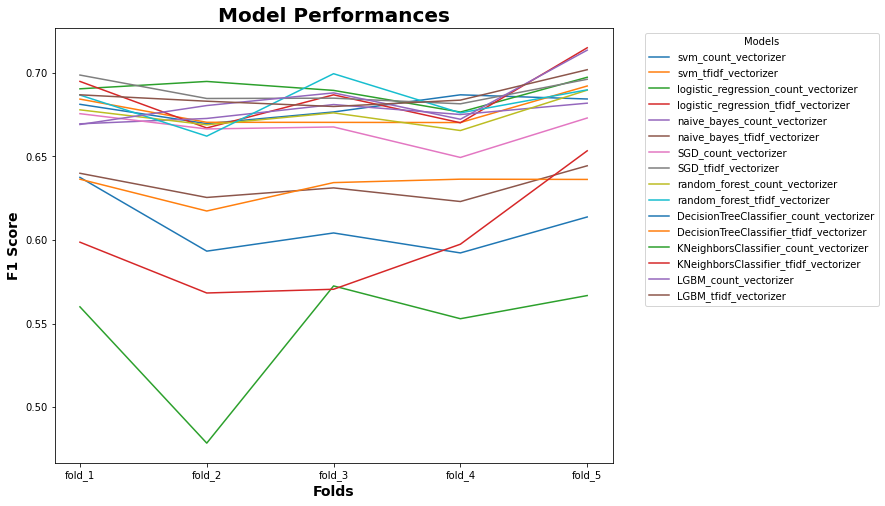

In [42]:
# transposing the dataframe
model_names = models_df["modelname_vectorType"].values
model_names_mappings = dict(zip(range(0, len(model_names)), model_names))
transpose_models_df = models_df.loc[:, "fold_1":"fold_5"].T.rename(columns=model_names_mappings)

x = transpose_models_df.index
fig, ax = plt.subplots(figsize=(10,8))

for model in transpose_models_df.columns:
    plt.plot(x, transpose_models_df[model], label=model)
plt.title("Model Performances", size=20, weight="bold")
plt.xlabel("Folds", size=14, weight="bold")
plt.ylabel("F1 Score", size=14, weight="bold")
plt.legend(title="Models", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

### Word2Vec Embeddings

In [34]:
train["label"].unique()

array([0, 1, 2])

In [35]:
labels = tf.keras.utils.to_categorical(train["label"], dtype="float32")

In [36]:
labels

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [37]:
import gensim.downloader as api
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Bidirectional,SpatialDropout1D,GRU,Conv1D,MaxPooling1D
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers, Sequential


In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import regularizers
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import ModelCheckpoint
max_words = 5000
max_len = 200

n_epochs = 8
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train["clean_data"].values)
sequences = tokenizer.texts_to_sequences(train["clean_data"].values)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[   0    0    0 ...    5    1   29]
 [   0    0    0 ...   10 2206 3099]
 [   0    0    0 ...  274  478  741]
 ...
 [   0    0    0 ... 2603 2198   34]
 [   0    0    0 ...   44   47    1]
 [   0    0    0 ... 1596   52  173]]


In [48]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(tweets,labels, random_state=0)
print (len(X_train),len(X_test),len(y_train),len(y_test))

3150 1050 3150 1050


In [39]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    


In [50]:
## LSTM 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import datasets

from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import History

from tensorflow.keras import losses
vocab_size = 5000
embedding_size = 32
epochs=20
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8
max_len=50



sgd1 = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model1 = Sequential()
model1.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model1.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model1.add(MaxPooling1D(pool_size=2))
model1.add(LSTM(15,dropout=0.5))
model1.add(Dense(3,activation='softmax'))

# initializing early stopping 
early_stopping = EarlyStopping(monitor='loss', patience=3)

print(model1.summary())
# Compile model
model1.compile(loss='categorical_crossentropy', optimizer=sgd1, 
               metrics=['accuracy'])

# Train model
batch_size = 64
history1 = model1.fit(X_train, y_train,
                      validation_data=(X_test, y_test),callbacks=[early_stopping],
                      batch_size=batch_size, epochs=epochs, verbose=1)
model1.save('lstm_best_model.h5')
print('LSTM Best model saved')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 32)            160000    
_________________________________________________________________
conv1d (Conv1D)              (None, 50, 32)            3104      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 25, 32)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 15)                2880      
_________________________________________________________________
dense (Dense)                (None, 3)                 48        
Total params: 166,032
Trainable params: 166,032
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
50/50 [==============================] - 4s 16ms/step - loss: 0.8540 - accuracy: 0.6175 - val_loss: 

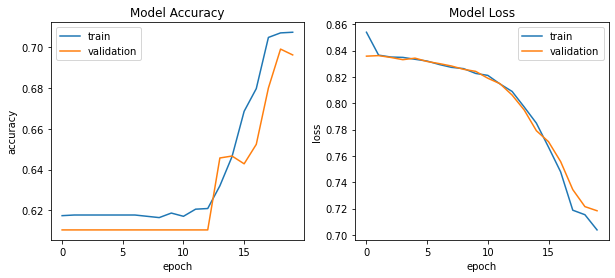

In [51]:
plot_training_hist(history1)

In [52]:
## BILSTM

sgd2 = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# Build model
model2= Sequential()
model2.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model2.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Bidirectional(LSTM(32)))
model2.add(Dropout(0.4))
model2.add(Dense(3, activation='softmax'))

# initializing early stopping 
early_stopping = EarlyStopping(monitor='loss', patience=3)

print(model2.summary())

# Compile model
model2.compile(loss='categorical_crossentropy', optimizer=sgd2, 
               metrics=['accuracy'])

# Train model

batch_size = 64
history2 = model2.fit(X_train, y_train,
                      validation_data=(X_test, y_test),callbacks=[early_stopping],
                      batch_size=batch_size, epochs=epochs, verbose=1)
model2.save('bi_lstm_best_model.h5')
print('BILSTM Best model saved')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 32)            160000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 50, 32)            3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 25, 32)            0         
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                16640     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 195       
Total params: 179,939
Trainable params: 179,939
Non-trainable params: 0
________________________________________________

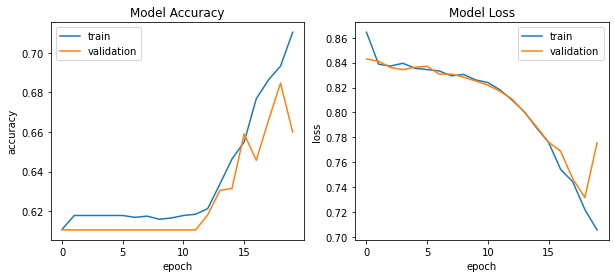

In [53]:
plot_training_hist(history2)

In [54]:
## GRU

sgd3 = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# Build model
model3= Sequential()
model3.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model3.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model3.add(MaxPooling1D(pool_size=2))
model3.add(GRU(units=64,  dropout=0.2, recurrent_dropout=0.2))
model3.add(Dropout(0.4))
model3.add(Dense(3, activation='softmax'))

# initializing early stopping 
early_stopping = EarlyStopping(monitor='loss', patience=3)

print(model3.summary())

# Compile model
model3.compile(loss='categorical_crossentropy', optimizer=sgd3, 
               metrics=['accuracy'])

# Train model

batch_size = 64
history3 = model3.fit(X_train, y_train,
                      validation_data=(X_test, y_test),callbacks=[early_stopping],
                      batch_size=batch_size, epochs=epochs, verbose=1)
model3.save('gru_best_model.h5')
print('GRU Best model saved')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 50, 32)            160000    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 50, 32)            3104      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 25, 32)            0         
_________________________________________________________________
gru (GRU)                    (None, 64)                18816     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 195       
Total params: 182,115
Trainable params: 182,115
Non-trainable params: 0
________________________________________________

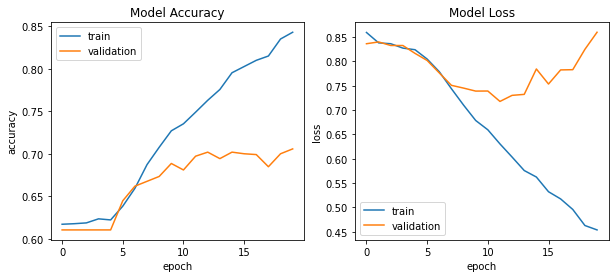

In [55]:
plot_training_hist(history3)

<b><u>BILSTM Model seems to perform well compared to othe  deep learning models </b></u>

### BERT

In [56]:
# install transformers


In [40]:
#import tensorflow as tf
#from tensorflow.keras.layers import Dense, Input
#from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.models import Model
#from tensorflow.keras.callbacks import ModelCheckpoint


import transformers
from tqdm.notebook import tqdm
from tokenizers import BertWordPieceTokenizer

In [41]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
    
except:
    strategy = tf.distribute.get_strategy()
    
print('Number of replicas in sync: ', strategy.num_replicas_in_sync)

Number of replicas in sync:  1


In [59]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased')

def bert_encode(data, maximum_length) :
    input_ids = []
    attention_masks = []

    for text in data:
        encoded = tokenizer.encode_plus(
            text, 
            add_special_tokens=True,
            max_length=maximum_length,
            pad_to_max_length=True,

            return_attention_mask=True,
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
        
    return np.array(input_ids),np.array(attention_masks)


In [60]:
texts = train["clean_data"]
target = labels


train_input_ids, train_attention_masks = bert_encode(texts,60)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [61]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

def create_model(bert_model):
    
    input_ids = tf.keras.Input(shape=(60,),dtype='int32')
    attention_masks = tf.keras.Input(shape=(60,),dtype='int32')

    output = bert_model([input_ids,attention_masks])
    output = output[1]
    output = tf.keras.layers.Dense(32,activation='relu')(output)
    output = tf.keras.layers.Dropout(0.2)(output)
    output = tf.keras.layers.Dense(3,activation='softmax')(output)
    
    model = tf.keras.models.Model(inputs = [input_ids,attention_masks],outputs = output)
    model.compile(Adam(lr=3e-5, decay = 1e-6), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [62]:
from transformers import TFBertModel
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [63]:
bb_model = create_model(bert_model)
bb_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 60)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 60)]         0                                            
__________________________________________________________________________________________________
tf_bert_model (TFBertModel)     TFBaseModelOutputWit 109482240   input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 32)           24608       tf_bert_model[0][1]          

In [64]:
early_stopping=EarlyStopping(monitor='loss', patience=3)
history4 = bb_model.fit(
    [train_input_ids, train_attention_masks],
    target,
    validation_split=0.3, 
    epochs=6,
    batch_size=10,callbacks=[early_stopping]
)

Epoch 1/6
294/294 [==============================] - 28s 70ms/step - loss: 0.7907 - accuracy: 0.6565 - val_loss: 0.7615 - val_accuracy: 0.6595
Epoch 2/6
294/294 [==============================] - 19s 65ms/step - loss: 0.6340 - accuracy: 0.7361 - val_loss: 0.7903 - val_accuracy: 0.6881
Epoch 3/6
294/294 [==============================] - 19s 65ms/step - loss: 0.4889 - accuracy: 0.8024 - val_loss: 0.8391 - val_accuracy: 0.6817
Epoch 4/6
294/294 [==============================] - 19s 66ms/step - loss: 0.3529 - accuracy: 0.8565 - val_loss: 0.9143 - val_accuracy: 0.6762
Epoch 5/6
294/294 [==============================] - 20s 66ms/step - loss: 0.2479 - accuracy: 0.9017 - val_loss: 1.2538 - val_accuracy: 0.6937
Epoch 6/6
294/294 [==============================] - 19s 65ms/step - loss: 0.1627 - accuracy: 0.9415 - val_loss: 1.2842 - val_accuracy: 0.6833


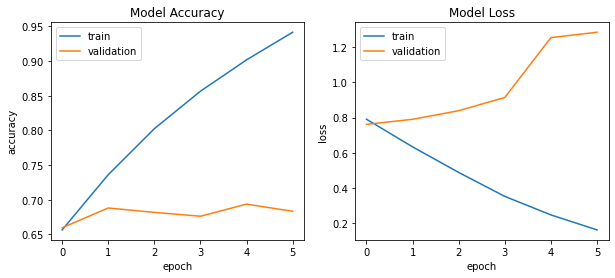

In [65]:
plot_training_hist(history4)

In [66]:
#model.save('bert_base_best_model',save_format='h5')
#print('Bert Best model saved')


# https://github.com/huggingface/transformers/issues/4444

##model.save_weights('bert_base_model_weights')

###  COVID Twitter bert 

In [67]:
#! pip install pydot graphviz
#tf.keras.utils.plot_model(model)

In [70]:
#! pip install tensorflow_hub bert-tensorflow

! pip install tensorflow-estimator==2.6.0

  Using cached tensorflow_estimator-2.6.0-py2.py3-none-any.whl (462 kB)
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0


In [43]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow_hub as hub

import tensorflow_hub as hub

# Load the required submodules
from  official.nlp.bert import tokenization


In [44]:
def ct_bert_encode(texts, tokenizer, max_len=512):
    all_tokens = []
    all_masks = []
    all_segments = []
    
    for text in texts:
        text = tokenizer.tokenize(text)
            
        text = text[:max_len-2]
        input_sequence = ["[CLS]"] + text + ["[SEP]"]
        pad_len = max_len - len(input_sequence)
        
        tokens = tokenizer.convert_tokens_to_ids(input_sequence)
        tokens += [0] * pad_len
        pad_masks = [1] * len(input_sequence) + [0] * pad_len
        segment_ids = [0] * max_len
        
        all_tokens.append(tokens)
        all_masks.append(pad_masks)
        all_segments.append(segment_ids)
    
    return np.array(all_tokens), np.array(all_masks), np.array(all_segments)

In [45]:
%%time
 
bert_layer = hub.KerasLayer("https://tfhub.dev/digitalepidemiologylab/covid-twitter-bert/2", trainable=True)
#pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, input_type_ids])


INFO:absl:Using /tmp/tfhub_modules to cache modules.
INFO:absl:Downloading TF-Hub Module 'https://tfhub.dev/digitalepidemiologylab/covid-twitter-bert/2'.
INFO:absl:Downloading https://tfhub.dev/digitalepidemiologylab/covid-twitter-bert/2: 907.06MB
INFO:absl:Downloaded https://tfhub.dev/digitalepidemiologylab/covid-twitter-bert/2, Total size: 1.26GB
INFO:absl:Downloaded TF-Hub Module 'https://tfhub.dev/digitalepidemiologylab/covid-twitter-bert/2'.


CPU times: user 14.9 s, sys: 4.47 s, total: 19.4 s
Wall time: 28.2 s


In [46]:
def build_ct_model1(bert_layer, max_len=512):
    input_word_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    input_mask = Input(shape=(max_len,), dtype=tf.int32, name="input_mask")
    input_type_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_type_ids")

    _, sequence_output = bert_layer([input_word_ids, input_mask, input_type_ids])
    clf_output = sequence_output[:, 0, :]
    output = tf.keras.layers.Dropout(0.5)((clf_output))
    output = Dense(3, activation='sigmoid')(output)
    
    model = Model(inputs=[input_word_ids, input_mask, input_type_ids], outputs=output)
    # Compile model
    model.compile(Adam(lr=2e-5,  decay = 1e-6), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [47]:
def build_ct_model(bert_layer, max_len=512):
    input_word_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    input_mask = Input(shape=(max_len,), dtype=tf.int32, name="input_mask")
    input_type_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_type_ids")

    pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, input_type_ids])
    num_labels = 3
    initializer = tf.keras.initializers.TruncatedNormal(stddev=0.2)
    output = tf.keras.layers.Dropout(rate=0.2)(pooled_output)
    #output = tf.keras.layers.Dense(num_labels, kernel_initializer=initializer, name='output')(output)
    #output = tf.keras.layers.Dense(32,activation='relu')(output)
    #output = tf.keras.layers.Dropout(0.2)(output)
    #output = tf.keras.layers.Dense(3,activation='softmax')(output)

    classifier_model = tf.keras.Model(
      inputs={
              'input_word_ids': input_word_ids,
              'input_mask': input_mask,
              'input_type_ids': input_type_ids},
      outputs=output)
    classifier_model.compile(Adam(lr=2e-5, decay = 1e-6), loss='categorical_crossentropy', metrics=['accuracy'])
    return classifier_model

In [48]:
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case)

In [49]:
texts = train["clean_data"]
target = labels

train_input = ct_bert_encode(texts, tokenizer, max_len=100)
train_labels = target



In [50]:

ct_model = build_ct_model1(bert_layer, max_len=100)
ct_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 100)]        0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 100)]        0                                            
__________________________________________________________________________________________________
input_type_ids (InputLayer)     [(None, 100)]        0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        [(None, 1024), (None 335141889   input_word_ids[0][0]             
                                                                 input_mask[0][0]             

In [51]:
#early_stopping=EarlyStopping(monitor='loss', patience=3)
#history5 = model.fit(
#    [train_input_ids, train_attention_masks],
#    target,
#    validation_split=0.2, 
#    epochs=6,
#    batch_size=10,callbacks=[early_stopping]
#)

In [52]:
checkpoint = ModelCheckpoint('model.h5', monitor='val_loss', save_best_only=True)

train_history = ct_model.fit(
    train_input, train_labels,
    validation_split=0.30,
    epochs=5,
    callbacks=[checkpoint],
    batch_size=10
)

Epoch 1/5
294/294 [==============================] - 112s 300ms/step - loss: 1.1956 - accuracy: 0.6259 - val_loss: 1.0835 - val_accuracy: 0.6357
Epoch 2/5
294/294 [==============================] - 86s 294ms/step - loss: 0.7753 - accuracy: 0.7241 - val_loss: 1.0908 - val_accuracy: 0.6683
Epoch 3/5
294/294 [==============================] - 86s 294ms/step - loss: 0.6712 - accuracy: 0.7643 - val_loss: 1.3057 - val_accuracy: 0.6944
Epoch 4/5
294/294 [==============================] - 86s 294ms/step - loss: 0.4873 - accuracy: 0.8327 - val_loss: 1.1052 - val_accuracy: 0.7079
Epoch 5/5
294/294 [==============================] - 97s 330ms/step - loss: 0.2897 - accuracy: 0.8976 - val_loss: 1.2025 - val_accuracy: 0.7167


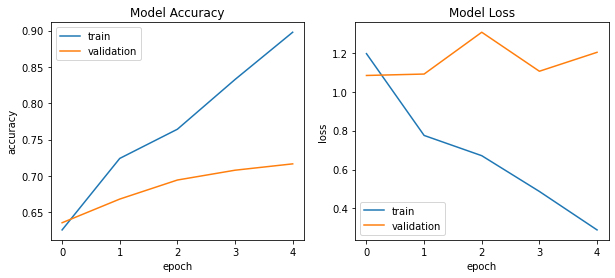

In [53]:
plot_training_hist(train_history)